# CASE STUDY ON NUERAL NETWORK AND HYPER PARAMETER TUNING
You are provided with a csv file (magic_gamma_telescope04.csv) dataset which contains telescopic experiment data. Using the features given in it, you need to classify the outcome "class". 

• Prepare a model which can classify it with f1 score = 70% and accuracy = 75%.

• Use neural networks combined with any HP parameter tuning.

• You can make use of any preprocessing activities if needed.

• No external data shall be added for increasing evaluation metric values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the data
df = pd.read_csv('magic_gamma_telescope04_.csv')
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df.shape

(19020, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   19020 non-null  float64
 1   fwidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconc1    19020 non-null  float64
 5   fsym      19020 non-null  float64
 6   fm3long   19020 non-null  float64
 7   fm3trans  19020 non-null  float64
 8   falpha    19020 non-null  float64
 9   dist      19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [8]:
df.isna().sum()

flength     0
fwidth      0
fsize       0
fconc       0
fconc1      0
fsym        0
fm3long     0
fm3trans    0
falpha      0
dist        0
class       0
dtype: int64

Insights-There are no missing values

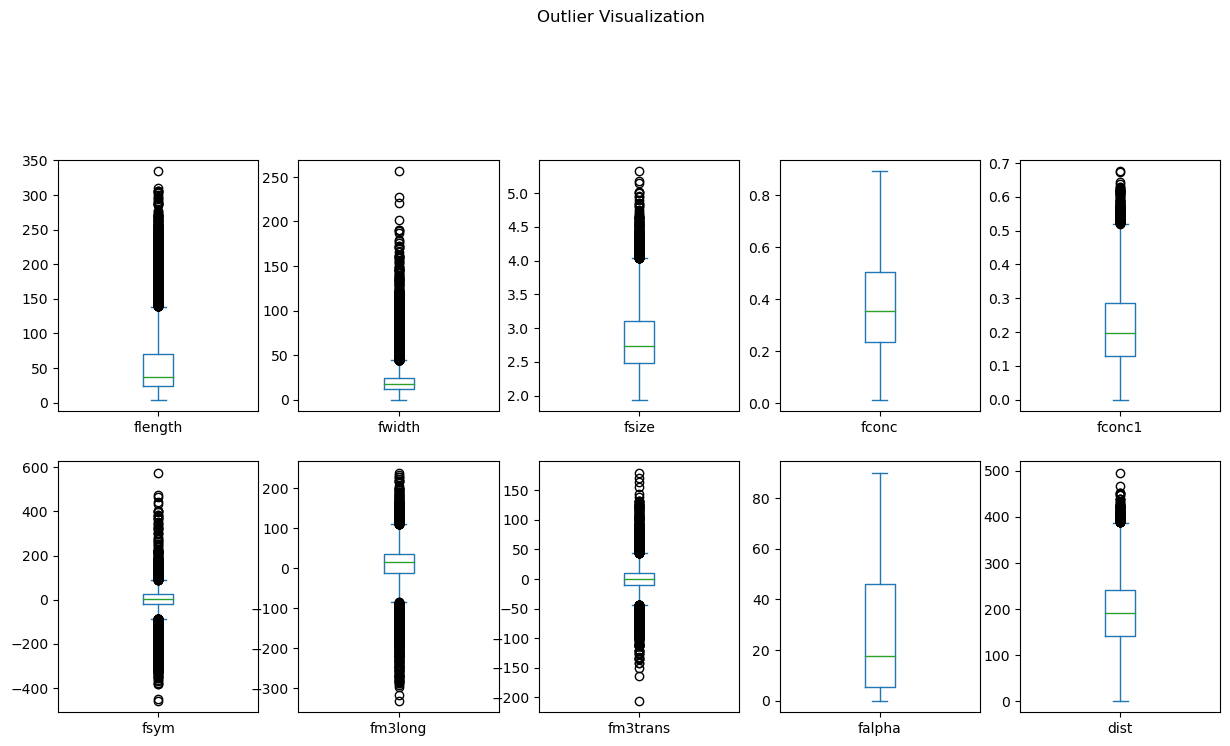

In [9]:
# plotting boxplots
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

In [10]:
# Splitting dataset into X and y
y = df['class']
X = df.drop('class', axis = 1)

In [11]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [12]:
minMaxScaler = MinMaxScaler()
X = minMaxScaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
le = LabelEncoder()
y_en = le.fit_transform(y)
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

In [18]:
#Modelling
from keras.models import Sequential
model = Sequential()

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [20]:
model.fit(X_train, y_train_en, batch_size=12, epochs=100, 
          validation_data=(X_test, y_test_en), callbacks=[early_stop])

Epoch 1/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.5068 - accuracy: 0.7593 - val_loss: 0.4274 - val_accuracy: 0.8081
Epoch 2/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.4168 - accuracy: 0.8145 - val_loss: 0.4026 - val_accuracy: 0.8197
Epoch 3/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.4003 - accuracy: 0.8239 - val_loss: 0.3933 - val_accuracy: 0.8310
Epoch 4/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3924 - accuracy: 0.8303 - val_loss: 0.3870 - val_accuracy: 0.8349
Epoch 5/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3866 - accuracy: 0.8335 - val_loss: 0.3839 - val_accuracy: 0.8346
Epoch 6/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3835 - accuracy: 0.8369 - val_loss: 0.3961 - val_accuracy: 0.8297
Epoch 7/100
1268/1268 [==============================] - 2s 2ms/step - loss: 0.3797 - accuracy: 0.8366 - val_loss: 0.3818 - val_ac

In [21]:
ann_metrics = pd.DataFrame(model.history.history)
ann_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.506833,0.759267,0.427385,0.808097
1,0.416777,0.814472,0.402632,0.819664
2,0.400349,0.823870,0.393251,0.830967
3,0.392367,0.830310,0.386980,0.834911
4,0.386633,0.833465,0.383921,0.834648
5,0.383487,0.836948,0.396132,0.829653
6,0.379720,0.836619,0.381767,0.840431
7,0.377955,0.838920,0.378642,0.840168
8,0.375269,0.840760,0.376365,0.842008
9,0.373765,0.842928,0.370606,0.843060


<AxesSubplot:>

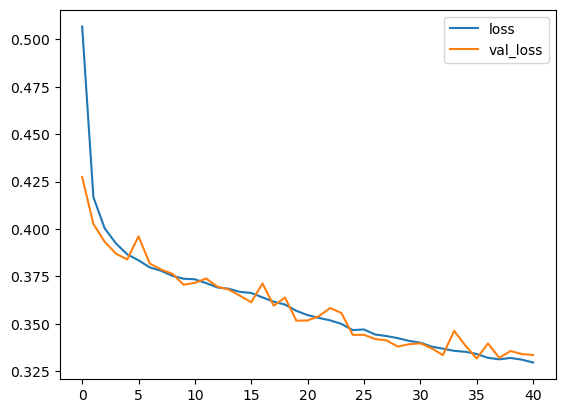

In [22]:
ann_metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

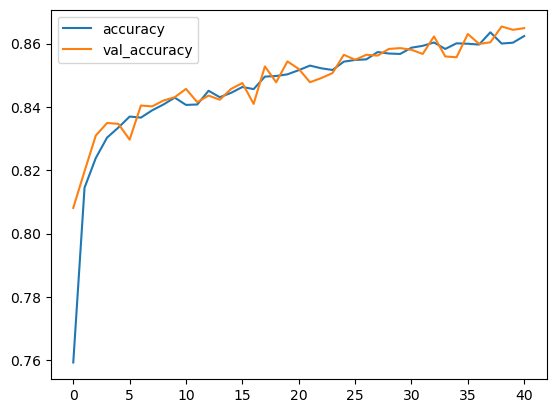

In [23]:
ann_metrics[['accuracy', 'val_accuracy']].plot()

In [24]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

119/119 [==============================] - 0s 1ms/step


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [26]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2460
           1       0.91      0.69      0.78      1344

    accuracy                           0.86      3804
   macro avg       0.88      0.82      0.84      3804
weighted avg       0.87      0.86      0.86      3804



In [27]:
confusion_matrix(y_test_en, predictions)

array([[2369,   91],
       [ 423,  921]], dtype=int64)

In [28]:
accuracy_score(y_test_en, predictions)

0.8648790746582544

In [29]:
f1_score(y_test_en, predictions)

0.7818336162988115

In [30]:
def create_model(neurons, dropout_rate, optimizer='adam'):

	model = Sequential()
	model.add(Dense(neurons, input_shape=(10,), activation='relu'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, activation='sigmoid'))
 
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [31]:
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate = [0.2, 0.3, 0.4, 0.5]
neurons = [15, 20, 25, 30]

param_grid = dict(model__optimizer=optimizer, model__dropout_rate=dropout_rate, 
                  model__neurons=neurons)

In [32]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [33]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3).


In [34]:
grid_result = grid.fit(X, y_en)

In [35]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864196 using {'model__dropout_rate': 0.2, 'model__neurons': 30, 'model__optimizer': 'RMSprop'}
0.830284 (0.010239) with: {'model__dropout_rate': 0.2, 'model__neurons': 15, 'model__optimizer': 'SGD'}
0.858149 (0.004708) with: {'model__dropout_rate': 0.2, 'model__neurons': 15, 'model__optimizer': 'RMSprop'}
0.851788 (0.008578) with: {'model__dropout_rate': 0.2, 'model__neurons': 15, 'model__optimizer': 'Adam'}
0.834595 (0.002904) with: {'model__dropout_rate': 0.2, 'model__neurons': 20, 'model__optimizer': 'SGD'}
0.860515 (0.004003) with: {'model__dropout_rate': 0.2, 'model__neurons': 20, 'model__optimizer': 'RMSprop'}
0.857781 (0.001777) with: {'model__dropout_rate': 0.2, 'model__neurons': 20, 'model__optimizer': 'Adam'}
0.836698 (0.002082) with: {'model__dropout_rate': 0.2, 'model__neurons': 25, 'model__optimizer': 'SGD'}
0.858833 (0.004456) with: {'model__dropout_rate': 0.2, 'model__neurons': 25, 'model__optimizer': 'RMSprop'}
0.861356 (0.004684) with: {'model__dropout_rate': 0